# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** As i somewhat expected from reading the introductions the simulation runs in steps. The smartcab does not seem to move at all during the simulation that i did run for 83 steps. In terms of rewards, the driving agent receives both positive and negative results. Because the car remains stationary all the time and it stands before a traffic light, sometimes, when the light is red, not moving is the correct decision. This is when the reward is positive. On the other hand, when the light is green and there is no oncomming trafic, the reward is negative.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:** For agent.py i will discuss num_dummies, learning and enforce_deadline flags. The first one refers to the number of cars, it can be set to environment and specifies the number of the other cars that are present in the simulation. More cars means more traffic with whatever that implies (more things can go wrong, the car will go slower etc.). Regaring learning, this a boolean control parameter for whether to allow the agent of the LearningAgent class to use Q-learning to learn. Finally, enforce_deadline refers to when the learning agent is being set as the primary agent. Primary agent is mainly about a boolean variable that separates the learning agent with the dummies and this enforce_deadline flag which is useful to adjust the penalty according to the remaining time.

Additionally, in the environment.py, act() is called when an agent performs an action; in simulator.py, render_text() renders the console feedback, while render() renders the graphics in the GUI; in planner.py, the next_waypoint will consider East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


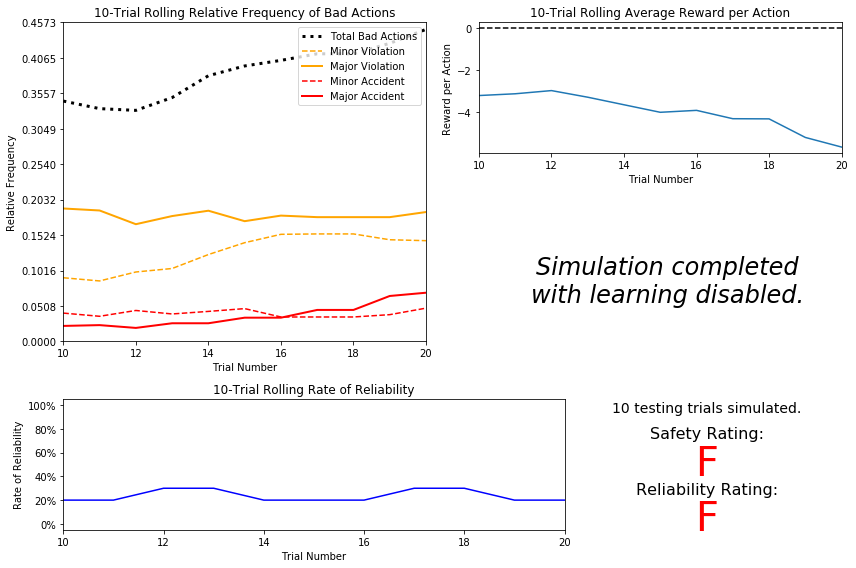

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** According to the visualizations the agent makes bad decisions around 45% of the time with 11% of them being accidents. 
Given that with random.choice() (which was used the for agent's method choose_action()), one move is being selected uniformly from the pool of all four possible moves without paying attention to what is happening at each intersection, these numbers seem very realistic. 

Regarding the rewards the agent receives they vary according to the the severity of the mistake (for the negative rewards) or the correctness of the move (for positive rewards). The rewarded average seems to increase to its upper limit overtime so probably this means that the agent is heavily penalized. 


However, despite the fact that the negative rewards apply, the outcome of results does not seem to be affected. We can see this from the reliability rolling rate which remains stable for 10 trials but this completely makes sense since we just added the code that picks the next move at random without any logic. 
Finally of course this Smartcab is not considered safe or reliable for any passengers, this is also obvious from its rates as it scores F in both categories.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:** To answer this question i will first discuss all features separately and then explain my choise. It seems that two features that are exclusive to efficiency are 'waypoint' and 'deadline' for obvious reasons (waypoint because it explains where to go and deadline shows how fast). Between the two, 'waypoint' is clearly the most important one because without knowing where to go knowing the deadline does not help. A feature that exclusively adds to safety from these features is 'light'. That is especially obvious since stopping at an intersection where we know for sure that there are no incoming viehicles holds us back in efficiency for the sake of too much safety.

On the other hand, the other three features that show the intentions of the oncoming, rightcoming and leftcoming cars can add up to both safety and efficiency. 'oncoming' can add up to safety when turning left (and thus allow our agent to learn this behavior and be efficient), since such a turn is not permitted if an oncoming car is going forward or left (in the other car's perspective). Also, 'left' adds up to safety when attempting to turn right during a red light, a behavior which is permitted when there is no traffic coming forward from the left side. As far as 'right' goes, this feature seems less significant than the other two since it does not help us to make any move really, since forward we go with green, left we go with green and checking the 'oncoming' and right we go with green or red + checking 'left'. It looks like it could affect decision making only in some case where the light rules were bendable and it was allowed to move from an intersection with a red light given that you know the intentions of all other cars in the intersection, or some fringe case like that. 

Given all that, i would say that in order to maximize safety and efficiency, only 'right' and 'deadline' can be left out. As has already been said the informations from 'right' do not contribute very much to either of the two metrics and it is pretty much covered by the rest of the features. As far as 'deadline' goes the contribution does not seem to be very significant since as mentioned earlier the 'waypoint' information is the most important regarding efficiency. Also, another disadvantage that comes with the 'deadline' feature is that it makes our state space explode since a goal can be from 1 step further to more than 10. 

NOTE: On a final note, i want to mention that at some point i deliberated whether it would be useful to leave out either the 'oncoming' or 'left' feature, so that the algorithm won't learn to turn left or right, since one way of turning is enough to go anywhere. Such a move would reduce the complexity of the state space and the algorithm could converge faster but it seemed after some tests that this move might prevent efficiency to converge to the optimal A+.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** The state space will have four elements given the features selected above, namely:

('waypoint', 'light', 'left', 'oncoming').

The number of values each feature can take is (3, 2, 4, 4). That is because 'waypoint' has 3 possible values, 'light' has 2, 'left' has 4 and 'oncoming' has another 4. This shows that the probability of seeing each combination at a random time is 1/96 (since there is a total of 3\*2\*4\*4=96 possible states). Probably around 2000 experience tuples would be a reasonable number of training material, given that the states are chosen by a uniform distribution. That means each state would be seen roughly 20 times, and given that each state has 4 actions, every state-action pair would be seen around 5 times. Of course all that is very approximate and there would definately be state-action pairs or even whole states that might still not be seen. 

However, in the Q-learning training process the choise of states and actions is not uniform so in this case more or less tuples might be needed in order to learn a policy that takes into acount every state. Finally, in terms of translating that to training trials from experience tuples, given that each trial has somewhere around 10 steps (where each step is a tuple), that would be around 200 training trials.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

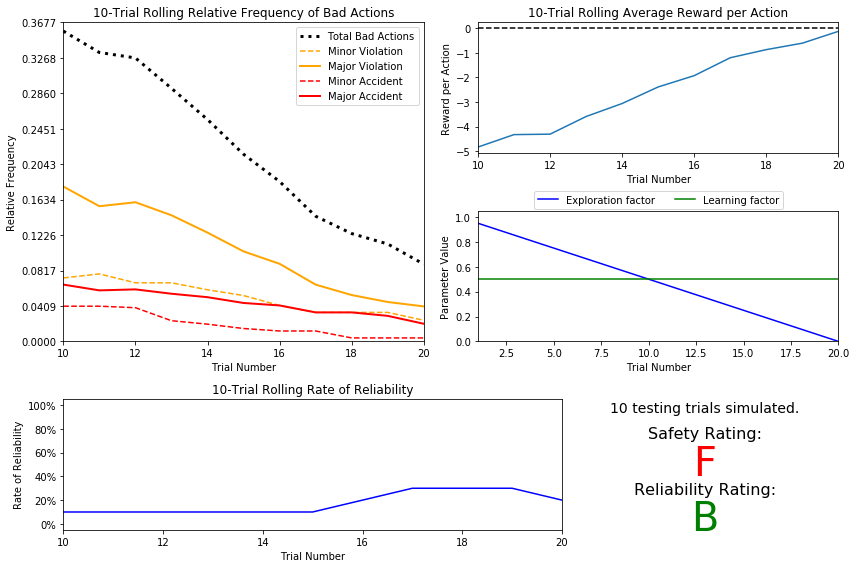

In [2]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** Looking at the observations from the default Q-Learning agent, the first thing that can be seen is that it looks quite different as far as graphs go in comparison to the basic driving agent that was implemented and plotted earlier. The only similarities are that the accidents are less likely than the simpler violations and that safety still scores F. Besides that, as the number of training tials increases, the number of total bad actions seems to be dropping considerably and the average reward increases from a negative value and reaches almost 0; these are both the reverse of what happens with the basic agent case. Also the rolling reliability rate slightly increases instead of remaining steady. According to the ratings, the view is - quite surprisingly - not very different in the safety department where this learner scores F, similarly to the basic agent. Reliability however scores B, whereas in the case of the basic agent it was F. The safety score is a bit surprising (and they are not a random good or bad scenario as i did run the algorithm several times and safety scores F consistently whereas reliability has scored from A+ to F; mostly As), given that the graphs tell us quite a different story. The explanation that seems logical is that the safety pattern is finer than the reliability one and thus harder to pick up. To learn to be reliable means to learn to turn at the indicated waypoint no matter the crash (because even in a major crash the ride continues which is a bit odd), whereas to be safe needs to learn when to obey the light and defy the waypoint.

NOTE: While experimenting i also run the simulation with three features, excluding 'oncoming' to test the hypothesis that a smaller state space will learn faster, and the ratings are indeed different. Instead of F in safety and B in reliability, the scores were A+ and C respectively.

Furthermore, as far as the exploration factor goes and the number of training trials before testing, due to the fact that 'e' was set to 1.0 and was made to decay linearly by 0.05 after each trial, the total training trials the agent required before testing were only 20. That makes sense since it takes 20 steps to nullify 'e' which is the point where the decisions are made purely according to the Q table. The fact that 'e' decays this way can also be seen from the parameters panel and from how steep the total bad actions curve is (which is due to the fact that the more we go into training, the less random are the decisions). The decaying function is accurately represented in the parameters panel as it shows how (in comparison to the learning factor 'a' which is stable to 0.5) the experience factor linearly decays over time.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

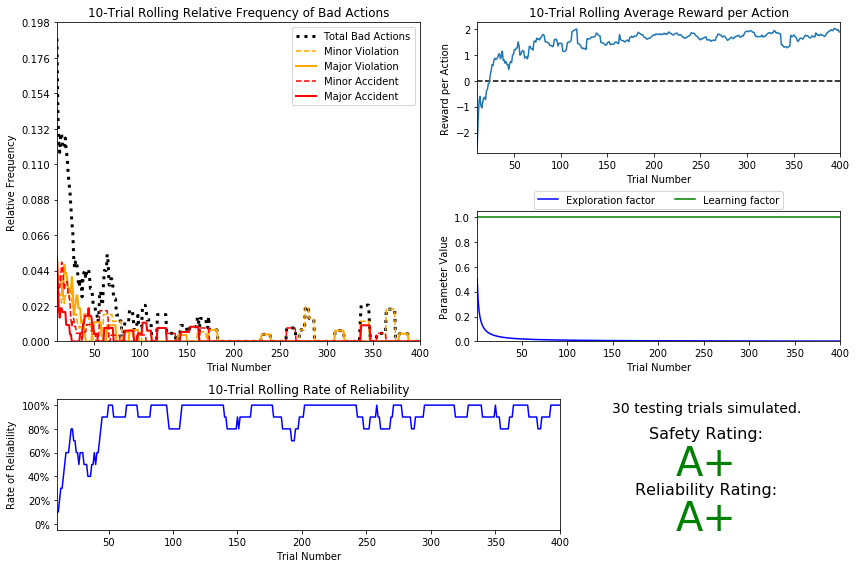

In [2]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** The decaying function used for epsilon was e=1/t, with a starting value 1.0 for t (and therefore e=1.0 at the first trial) which was steadily increased by 1 after every trial. The epsilon-tolerance was set to 0.0025 and alpha 1.0. This corresponds to 400 trials before going into testing as can also be seen on the graph. The improvement of this Q-Learner in comparison to the one of the previous section is quite significant. The total bad actions converged from above 0.15 to 0.0, the rate of reliability from aroune 17% to 100%, the reward per action from -2 to around 2 and the ratings for safety and reliability from a respective F, B to a very appropriate A+, A+. These ratings, along with the other aforementioned observations show that the learner converged to if not the exact optimal policy, very close to it.

The choise of the decaying function and the parameters were after some experimenting that should also be discussed. First of all given the fact that the graph of total bad actions and the rolling reliability show the entire training history of trials, one can see at the plots at which point in time (at which trials interval) the learner started to converge into a near optimal policy. So i thought that the way i should approach finding the best setting should first be to run all the suggested equations by the excersice (plus one more, namely e=1/t) for a long period (1-2k trials) with the same parameters, and see when they start converging. Given that they all pick up the optimal policy the best one would be the one that learns it faster than the others. 1/t seemed to perform the best (fastest to converge) so i did run it with several number of parameters, with the goal to find out how to get it to converge even quicker and reliably to A+A+ (reliably meaning that despite how many simulations with the same set of parameters, the score remains pretty much the same). 

The best set of parameters i found for e=1/t were tolerance=0.0025 (accounts for 400 trials) and alpha=1.0. A bit surprisingly, despite the fact that the graphs show that at around 200 trials the algorithm converges, testing the learner with 200 trials was sometimes able to deliver A+A+ results but it was a bit inconsistent and was sometimes falling short of that. That is the reason i trained the learner at 400 trials.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** As far as the learned policy goes, summarizing it thoroughly is an interesting task, given the 96 state space that was chosen for the implementations. The way i will approach it is by grouping up the states that have a similar response. For example, for every state that it has light set to red, the corresponding action of the optimal policy should be to do nothing, with the only exception when the waypoint is right, and there is no oncomming traffic from the left. On the other hand, when the light is green, the situation is a bit more complex depending on the waypoint. When the waypoint is right, the action should be right no matter what seem to be the intentions of the other drivers. Similarly for the forward waypoint on the green light, no matter the visible intentions of the other drivers, the action should be forward. On the left waypoint during the green light though, the optimal policy should respect the oncoming traffic indicator, and choose another action unless the intentions of the oncoming traffic is to turn left (that is the oncoming car's left) or None (meaning that there is no traffic). This case can be synopsized in the following table:

|  	| waypoint 'right' 	| waypoint 'left' 	| waypoint 'forward' 	|
|:-----:	|:-----:	|:-----:	|:-----:	|
|   **light red**  	|  The agent should turn right when traffic<br/>coming from the left does not go forward. | The agent is not at any case allowed to make the turn. |  The agent is not at any case allowed to make go forward. |
|   **light green**   	|  The agent should always take the turn right. | The agent is allowed to take the left turn only<br />when the oncomming traffic is not going forward or right. |  The agent should always go forward. |

However, all that is as far as the optimal policy goes. Whether this scenario is a match with our learner shows how robust our learner is. In general, after inspecting the 'sim_improved-learning.txt', we would say that as expected the learner did indeed learn the correct move in a great deal of occasions. Especially when it comes to the very broad pattern of "when the light is red don't move" and "when the light is green act according to the waypoint variable". However there are some more subtle patterns that need to picked up which are (as mentioned before) when the light is green and the waypoint left, the agent should act according to the 'oncomming' feature, and the case where the light is red and the waypoint right, where the agent should learn to act according to the 'left' feature. 

A bit surprisingly by observing the .txt file we can see that our A+A+ learner did not learn the 100% optimal policy, meaning that it takes some wrong decisions. In particular the 2 aforementioned subtle patterns were not picked 100% correct. As far as the more general pattern (which is broader and includes those 2), 14 out of the total 96 states seem to pick an inappropriate action given our knowledge for what it should be taken. To demonstrate this, a few example states (in parentheses) that miss the correct action and their list of actions (bullet point) are mentioned below as they are found in the file. Regarding the states in those parantheses, the first element refers to the 'waypoint', the second to 'light', the third to 'left' and the last to 'oncoming':

state ('right', 'red', 'left', 'forward'), in line 113
 - forward : -10.50
 -- right : 0.00
 -- None : 0.70
 -- left : -10.09
 
state ('right', 'red', 'left', 'right'), in line 209
 - forward : 0.00
 -- right : 0.00
 -- None : 1.78
 -- left : 0.00
 
state ('right', 'red', 'forward', 'right'), in line 545
 - forward : 0.00
 -- right : 0.00
 -- None : -0.14
 -- left : 0.00

state ('right', 'red', 'right', 'right'), in line 575
 - forward : 0.00
 -- right : 0.00
 -- None : 0.41
 -- left : 0.00

The above states, are a sample of how our learner picked up the "right waypoint" - "red light" pattern, which is a little bit nuanced as described earlier. The correct behavior that we expect from the optimal converged learner would be to always act by going right, unless the 'left' feature indicates that the driver on our agents left wants to go forward. In that case the correct, lawful and safe action is to wait and do nothing (None). In fact our learner did learn this pattern only at a 75% of the cases (12 out of 16 cases where the light is red and waypoint right will encourage our agent to do the right action). The above four cases are the ones it missed. The two first along with the fourth will indicate staying still instead of going right, and the third probably due to the fact that it has not been encountered much, it has already rejected the doing nothing action and is set to pick at random from the other three.

Furthermore, in regards to the other interesting pattern which is the "left turn" when the "light is green", this corresponds to again 16 states with this setting. At 50% of them, the left turn should happen when the oncomming traffic (the fourth feature) is either None or going left. When the oncomming traffic is right or forward however, it is an interesting case because there is no right answer that fits every case except that a left turn should be avoided. To account for that, another feature would be needed (the position of the goal intersection and our current intersection), so in our case, for these 8 cases where the left turn is not permitted with a green light any other answer is probably valid. 

Regarding how our learner picked up the pattern of green light - left turn, only one case is missed (can be seen below) out of the 16 that can be found in this smaller state space. In the case that can be seen below, a right turn is selected instead of left, since the oncoming traffic (the fourth feature) indicates the the oncoming viehicle is going left - which is ok for us to also turn left according to the rules. We can see that this pattern is picked up more easily but it needs to be said that it is more loosely defined than the previous one, since in the cases that the left turn cannot happen all other actions are deemed ok.

('left', 'green', 'forward', 'left')
 - forward : -0.10
 -- right : 0.14
 -- None : -4.26
 -- left : 0.00

Finally, besides these 5 cases where the policy is wrong, there are other 9 cases where the policy is also wrong. Especially in the state where the waypoint is right and the light green, 6 of those 9 mistakes are made. These are in lines 149, 197, 317, 329, 353 and 533. In addition to that there are more misses in lines 77, 437 and 497. The mistakes in general are of two natures. The learner either picked something up wrongly due to the fact that it didn't get a penalty from a wrong action (e.g. the fourth example shows how that state has a positive reward by doing the wrong action), or the learner didn't pick up anything yet and decides at random (e.g. the third example state). Finally, 10 of the 14 misses happened on 'right' waypoint which is logical since it has plausible alternatives - for example going forward is also ok when the light is green and remaining stationary instead of going right is also sort of not too bad when the light is red.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** The characteristic that has to do with the environment is probably the fact that how far the goal is, changes in every ride and the one about the Smartcab is that it cannot sense where it is by itself in the environment and where is the goal. Because of these, it cannot be calculated whether each move takes the Smartcab further from the goal or closer to it. The way it is now, the agent might make mistakes that make it get some negative or slightly positive immediate reward (meaning actions that are not of the optimal policy), but still compensate for that by the prolonged future rewards the 'gamma' factor offers. By immediately penalizing the increase of the distance this can be avoided.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.